## Observations and Insights 
**Study:** SCC tumor growth in mice treated through a variety of drug regimens

Results of study to compare the performance of Pymaceuticals' drug of interest, Capomulin, versus the other treatment regimens
>
>Notebook contains calculations & graphs of the study results supporting the below observations:
>>- The effectiveness of a drug regimen can be analyzed by comparing the statistical results of the last measured tumor size of each mouse under the various drug regimens looking at the statistical summary.  A drug regimen is more effective the smaller the average size tumor at last treatment.  This table was used to pick the top 4 most promising treatment regimens.
>>- The box plot chart helps illustrate the effectiveness of Capomulin drug regimen compared to 3 other existing drug regimens;  The less variation in the results indicates a more predictable result of that drug regimen on tumor growth.
>>-  The line graph illustrates that Capomulin effecively reduced the tumor size over the study's timepoints on mouse m957.
>>- Scatter plot & regression line illustrate that tumor size is positively coorelated with a mouse's weight (correlation coefficient = 0.84)

**Conclusion:**  *Capomulin* is almost as effective at shrinking tumor size as the the most effective existing drug regimen, Ramicine

In [1]:
%matplotlib notebook

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_results_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
mouse_results_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
duplicate_mouse_df = mouse_results_df.loc[mouse_results_df.duplicated(subset=["Mouse ID","Timepoint"],keep=False)]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Checking the number of mice.
count_mice = mouse_results_df.groupby("Mouse ID").nunique()
print(count_mice["Mouse ID"].sum())

249


In [5]:
mouse_result_all_timepoints_df = mouse_results_df.loc[mouse_results_df['Mouse ID'] != "g989"]
mouse_result_all_timepoints_df

count_mice_no_dup = mouse_result_all_timepoints_df["Mouse ID"].nunique()
print(count_mice_no_dup)

248


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_group = mouse_result_all_timepoints_df.groupby(["Mouse ID"]) \
                                ['Timepoint'].transform(max) == mouse_result_all_timepoints_df['Timepoint']

max_result_df = mouse_result_all_timepoints_df[mouse_group]
max_result_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [7]:
# Checking the number of mice in the clean DataFrame.
print(max_result_df["Mouse ID"].count())

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_tumor_by_regimen_df = mouse_result_all_timepoints_df[['Drug Regimen','Tumor Volume (mm3)']]

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stat_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").describe()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").mean()
median_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").median()
var_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").var()
std_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").std()
sem_by_regimen = stat_tumor_by_regimen_df.groupby("Drug Regimen").sem()

# Assemble the resulting series into a single summary dataframe.
sum_stats_by_regimen_df = pd.DataFrame({"Mean":mean_by_regimen['Tumor Volume (mm3)'],
                                        "Median":median_by_regimen['Tumor Volume (mm3)'],
                                        "Variance":var_by_regimen['Tumor Volume (mm3)'],
                                        "Std Dev":std_by_regimen['Tumor Volume (mm3)'],
                                        "SEM":sem_by_regimen['Tumor Volume (mm3)']}).reset_index()
summary_stat_by_regimen

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  148.0  52.320930  6.622085  45.000000  46.894328   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.446266  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
sum_stats_by_regimen_df

,Drug Regimen,Mean,Median,Variance,Std Dev,SEM
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

<IPython.core.display.Javascript object>


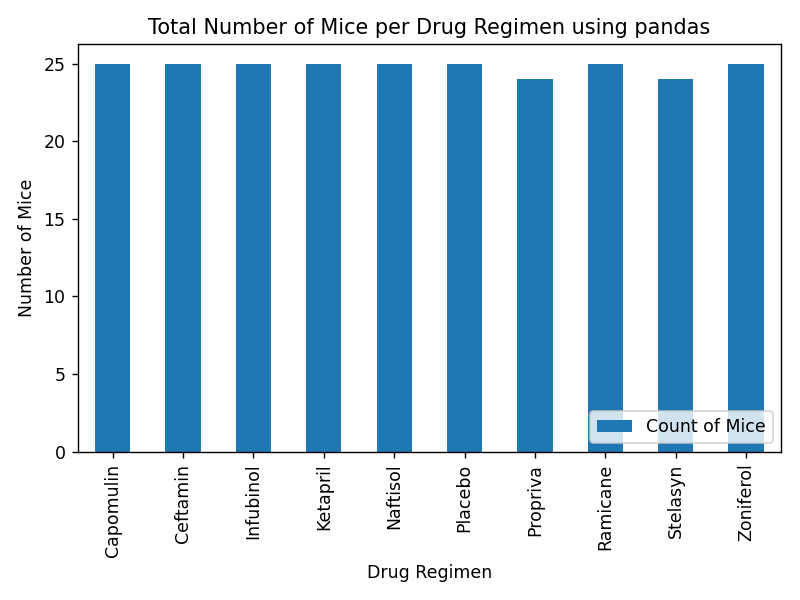

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
count_by_regimen = max_result_df.groupby("Drug Regimen").count().reset_index()
count_by_regimen = count_by_regimen.rename(columns={'Tumor Volume (mm3)':'Count of Mice'})
x_axis = np.arange(len(count_by_regimen))
count_by_regimen.plot(kind='bar',x= "Drug Regimen",y= 'Count of Mice').legend(loc='lower right')
plt.title("Total Number of Mice per Drug Regimen using pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()

<IPython.core.display.Javascript object>


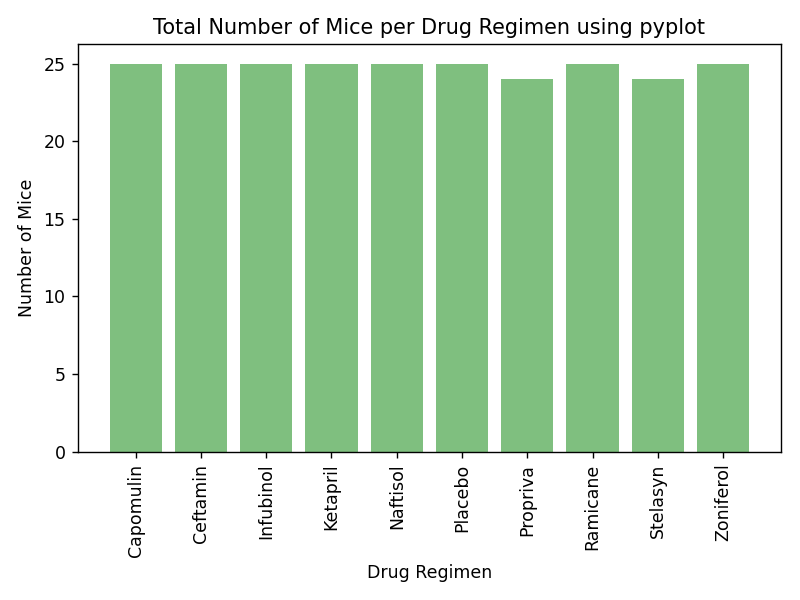

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
plt.figure()
plt.bar(x_axis,count_by_regimen['Count of Mice'],color='g', alpha=0.5, align="center",)

#Format bar chart
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, count_by_regimen['Drug Regimen'], rotation="vertical")

plt.title("Total Number of Mice per Drug Regimen using pyplot")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()


<IPython.core.display.Javascript object>


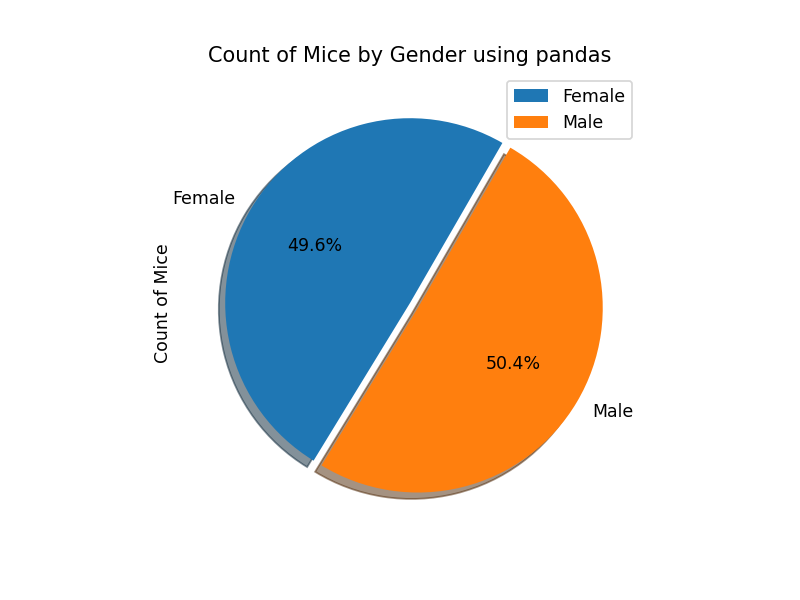

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
max_result_df.groupby('Sex').count()

count_by_gender_df = max_result_df.groupby('Sex').count()
count_by_gender_df = count_by_gender_df.rename(columns={'Mouse ID':'Count of Mice'})

plot = count_by_gender_df.plot(kind='pie',y='Count of Mice',title="Count of Mice by Gender using pandas",shadow=True,explode=(0,0.05), autopct='%1.1f%%',startangle=60)

<IPython.core.display.Javascript object>


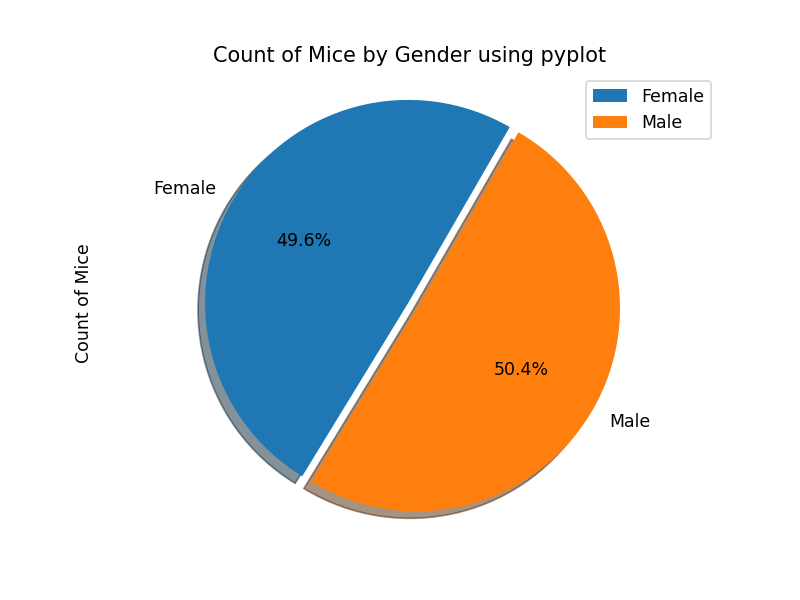

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.figure()

plt.pie(count_by_gender_df['Count of Mice'],labels=count_by_gender_df.index,shadow=True,autopct='%1.1f%%',explode=(0,0.05),startangle=60)
plt.title("Count of Mice by Gender using pyplot")
plt.ylabel("Count of Mice")
plt.axis("equal")
plt.legend(count_by_gender_df.index, loc="best")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#Capomulin 
capomulin_df = max_result_df.loc[max_result_df['Drug Regimen'] == "Capomulin"]
capomulin_df = capomulin_df.sort_values(['Tumor Volume (mm3)'])
capomulin = capomulin_df['Tumor Volume (mm3)']
capomulin_quartiles = capomulin.quantile([0.25,0.5,0.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)
capomulin_outlier_mice = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < capomulin_lower_bound) \
                                | (capomulin_df['Tumor Volume (mm3)'] > capomulin_upper_bound)]

print(f"The lower quartile of Capomulin is: {round(capomulin_lowerq,2)}")
print(f"The upper quartile of Capomulin is: {round(capomulin_upperq,2)}")
print(f"The interquartile range (IQR) of Capomulin is: {round(capomulin_iqr,3)}")
print(f"The the median of Capomulin is: {round(capomulin_quartiles[0.5],2)} ")
print(f"Values below {round(capomulin_lower_bound,2)} could be outliers.")
print(f"Values above {round(capomulin_upper_bound,2)} could be outliers.")
print(f"Number of Outlier values = {capomulin_outlier_mice['Tumor Volume (mm3)'].count()}")

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range (IQR) of Capomulin is: 7.782
The the median of Capomulin is: 38.13 
Values below 20.7 could be outliers.
Values above 51.83 could be outliers.
Number of Outlier values = 0


In [15]:
#Ramicane 
ramicane_df = max_result_df.loc[max_result_df['Drug Regimen'] == "Ramicane"]
ramicane_df = ramicane_df.sort_values(['Tumor Volume (mm3)'])
ramicane = ramicane_df['Tumor Volume (mm3)']
ramicane_quartiles = ramicane.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)
ramicane_outlier_mice = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < ramicane_lower_bound) \
                                | (ramicane_df['Tumor Volume (mm3)'] > ramicane_upper_bound)]

print(f"The lower quartile of Ramicane is: {round(ramicane_lowerq,2)}")
print(f"The upper quartile of Ramicane is: {round(ramicane_upperq,2)}")
print(f"The interquartile range  (IQR) of Ramicane is: {round(ramicane_iqr,3)}")
print(f"The the median of Ramicane is: {round(ramicane_quartiles[0.5],2)} ")
print(f"Values below {round(ramicane_lower_bound,2)} could be outliers.")
print(f"Values above {round(ramicane_upper_bound,2)} could be outliers.")
print(f"Number of Outlier values = {ramicane_outlier_mice['Tumor Volume (mm3)'].count()}")

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range  (IQR) of Ramicane is: 9.099
The the median of Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.
Number of Outlier values = 0


In [16]:
#Infubinol
infubinol_df = max_result_df.loc[max_result_df['Drug Regimen'] == "Infubinol"]
infubinol_df = infubinol_df.sort_values(['Tumor Volume (mm3)'])
infubinol = infubinol_df['Tumor Volume (mm3)']
infubinol_quartiles = infubinol.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)
infubinol_outlier_mice = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < infubinol_lower_bound) \
                                | (infubinol_df['Tumor Volume (mm3)'] > infubinol_upper_bound)]

print(f"The lower quartile of Infubinol is: {round(infubinol_lowerq,2)}")
print(f"The upper quartile of Infubinol is: {round(infubinol_upperq,2)}")
print(f"The interquartile range  (IQR) of Infubinol is: {round(infubinol_iqr,2)}")
print(f"The the median of Infubinol is: {round(infubinol_quartiles[0.5],2)} ")
print(f"Values below {round(infubinol_lower_bound,2)} could be outliers.")
print(f"Values above {round(infubinol_upper_bound,2)} could be outliers.")
print(f"Outlier value(s) = {infubinol_outlier_mice['Tumor Volume (mm3)']}")


The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range  (IQR) of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
Outlier value(s) = 669    36.321346
Name: Tumor Volume (mm3), dtype: float64


In [17]:
#Ceftamin
ceftamin_df = max_result_df.loc[max_result_df['Drug Regimen'] == "Ceftamin"].reset_index()
ceftamin_df = ceftamin_df.sort_values(['Tumor Volume (mm3)'])
ceftamin = ceftamin_df['Tumor Volume (mm3)']
ceftamin_quartiles = ceftamin.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)
ceftamin_outlier_mice = ceftamin_df.loc[(ceftamin_df['Tumor Volume (mm3)'] < ceftamin_lower_bound) \
                                | (ceftamin_df['Tumor Volume (mm3)'] > ceftamin_upper_bound)]

print(f"The lower quartile of Ceftamin is: {round(ceftamin_lowerq,2)}")
print(f"The upper quartile of Ceftamin is: {round(ceftamin_upperq,2)}")
print(f"The interquartile range  (IQR) of Ceftamin is: {round(ceftamin_iqr,2)}")
print(f"The the median of Ceftamin is: {round(ceftamin_quartiles[0.5],2)} ")
print(f"Values below {round(ceftamin_lower_bound,2)} could be outliers.")
print(f"Values above {round(ceftamin_upper_bound,2)} could be outliers.")
print(f"Number of Outlier values = {ceftamin_outlier_mice['Tumor Volume (mm3)'].count()}")

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range  (IQR) of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
Number of Outlier values = 0


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']
data = [capomulin,ramicane,infubinol,ceftamin]

<IPython.core.display.Javascript object>


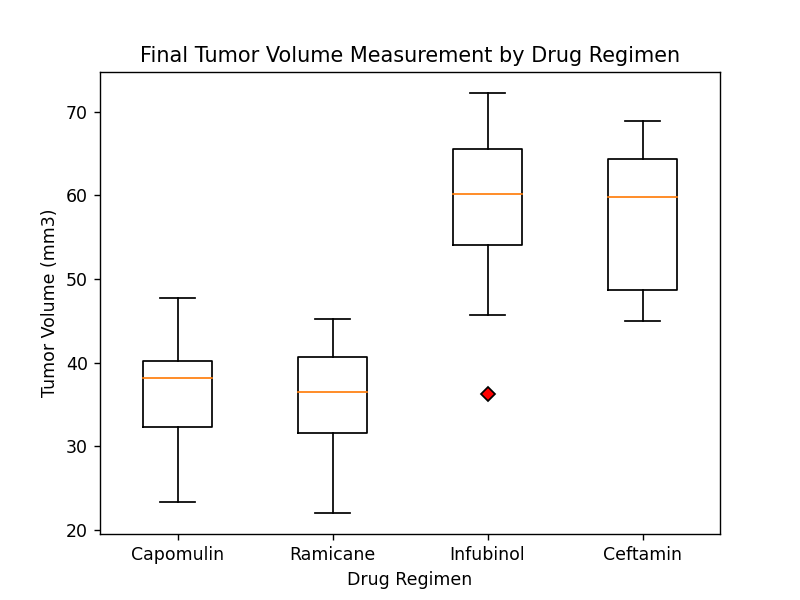

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_diamond = dict(markerfacecolor='r', marker='D')

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Measurement by Drug Regimen')
ax1.boxplot(data, labels = drug_regimen_list,flierprops=red_diamond)
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


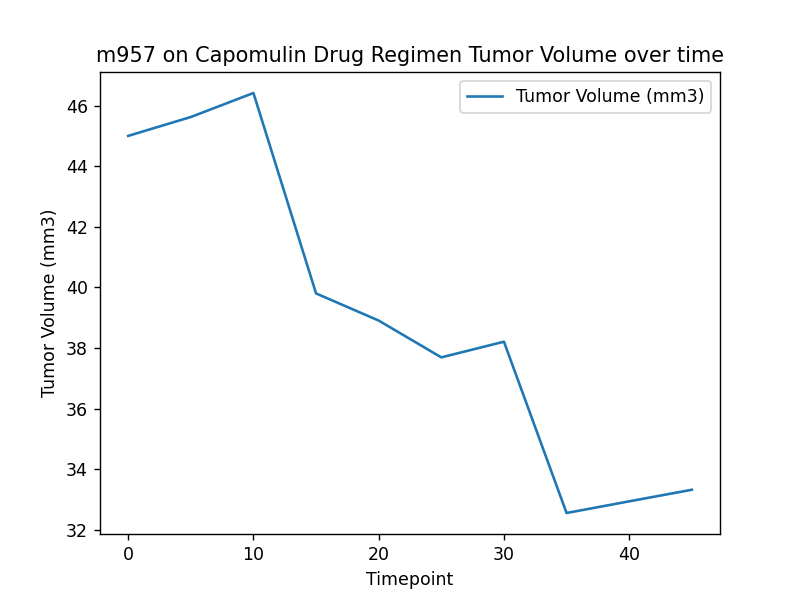

Text(0, 0.5, 'Tumor Volume (mm3)')

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
m957_mouse_results = mouse_results_df.loc[mouse_results_df['Mouse ID'] == "m957"].reset_index()
line_m957 = m957_mouse_results.plot.line(x='Timepoint',y='Tumor Volume (mm3)')
plt.title("m957 on Capomulin Drug Regimen Tumor Volume over time")
plt.ylabel('Tumor Volume (mm3)')

<IPython.core.display.Javascript object>


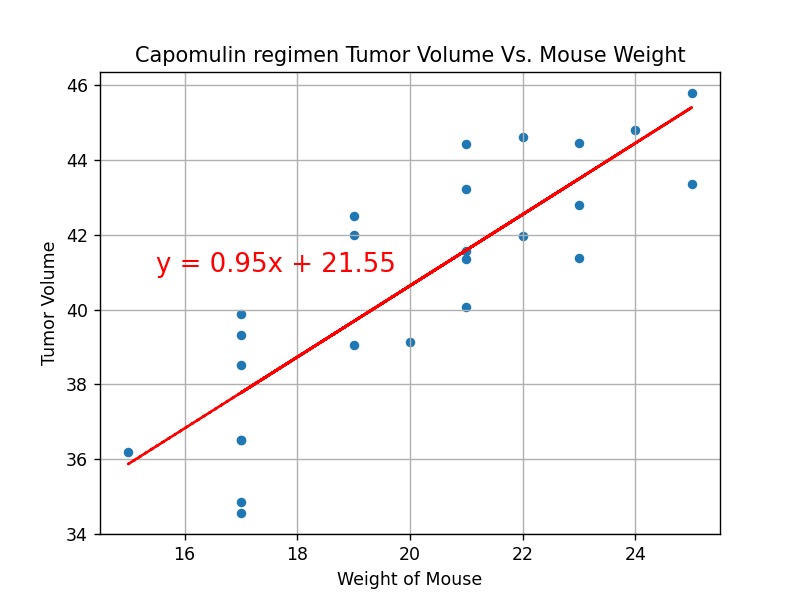

In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_all_df = mouse_result_all_timepoints_df.loc[mouse_result_all_timepoints_df['Drug Regimen'] == "Capomulin"]
capomulin_avg_df = capomulin_all_df.groupby('Mouse ID').mean()
capomulin_avg_df.plot(kind="scatter", y='Tumor Volume (mm3)', x='Weight (g)', grid=True,
               title="Capomulin regimen Tumor Volume Vs. Mouse Weight")
plt.show()

## Correlation and Regression

In [22]:
# Calculate the correlation coefficient 
# for mouse weight and average tumor volume for the Capomulin regime
capomulin_avg_df['Tumor Volume (mm3)'].describe()
capomulin_tumor = capomulin_avg_df['Tumor Volume (mm3)']
capomulin_weight = capomulin_avg_df['Weight (g)']
capomulin_correlation = round(st.pearsonr(capomulin_tumor,capomulin_weight)[0],2)

print(f"The correlation coefficient between Tumor Size acid and Mouse Weight is {capomulin_correlation}")

The correlation coefficient between Tumor Size acid and Mouse Weight is 0.84


In [23]:
#linear regression model 
vc_slope, vc_int, vc_r, vc_p, vc_std_err = st.linregress(capomulin_weight,capomulin_tumor)
vc_fit = vc_slope * capomulin_weight + vc_int

plt.plot(capomulin_weight,vc_fit,"--",color="red")
line_eq = "y = " + str(round(vc_slope,2)) + "x + " + str(round(vc_int,2))
plt.annotate(line_eq,(15.5,41),fontsize=15,color="red")
plt.ylabel('Tumor Volume')
plt.xlabel('Weight of Mouse')
plt.show()

print(line_eq)

y = 0.95x + 21.55
